In [1]:
import pandas as pd
import numpy as np

In [2]:
predicted_tumor_vol = pd.read_csv('patient_tumor_vol_version2.csv',names=['ID','vol'],header = 0)
ground_truth_tumor_vol = pd.read_excel('../Capstone-VS/VS_censor_send.xlsx', sheet_name='Include')

In [3]:
ground_truth_tumor_vol.head(5)

,ID,TargetVolume,target_name,Recurrence,Side
0,VS0,0.209,A:Left VS,N,L
1,VS1,0.402,A:R acoustic gtv,NaN,R
2,VS2,0.742,A:Acoustic gtv,N,R
3,VS3,0.158,A:R acoustic neu,N,R
4,VS4,2.295,A:L acoustic gtv,NaN,L


In [4]:
predicted_tumor_vol['ID'] = predicted_tumor_vol.ID.apply(lambda x: x.split('/')[-2])

In [5]:
predicted_tumor_vol

,ID,vol
0,VS277,1379.47080
1,VS99,203.89252
2,VS315,4486.00000
3,VS261,789.99940
4,VS59,1020.80840
...,...,...
286,VS37,1397.63940
287,VS84,419.22455
288,VS179,550.44250
289,VS44,275.89417


In [6]:
predicted_tumor_vol = predicted_tumor_vol.sort_values(by = 'ID').reset_index(drop = 'True')
predicted_tumor_vol.ID = predicted_tumor_vol.ID.astype('str')
ground_truth_tumor_vol = ground_truth_tumor_vol.sort_values(by = 'ID').reset_index(drop = 'True')[['ID', 'TargetVolume']]
ground_truth_tumor_vol.ID = ground_truth_tumor_vol.ID.astype('str')

In [7]:
merged_df = pd.merge(predicted_tumor_vol, ground_truth_tumor_vol, on = 'ID', how = 'inner')
merged_df['TargetVolume'] = merged_df['TargetVolume']*1000

In [8]:
merged_df.head()

,ID,vol,TargetVolume
0,VS0,221.38824,209.0
1,VS1,429.99115,402.0
2,VS10,118.43262,246.0
3,VS100,128.52630,116.0
4,VS101,1538.95120,1508.0


In [9]:
merged_df['diff'] = np.abs(merged_df.vol - merged_df.TargetVolume)
merged_df['percent_diff'] = merged_df['diff']/merged_df['TargetVolume']

In [10]:
merged_df = merged_df.sort_values(by = 'percent_diff', ascending = False).reset_index(drop = True)

In [11]:
merged_df

,ID,vol,TargetVolume,diff,percent_diff
0,VS201,728.764340,331.0,397.764340,1.201705
1,VS10,118.432620,246.0,127.567380,0.518567
2,VS154,125.834656,97.0,28.834656,0.297264
3,VS260,82.768250,67.0,15.768250,0.235347
4,VS254,39.028930,32.0,7.028930,0.219654
...,...,...,...,...,...
286,VS245,10646.150000,10600.0,46.150000,0.004354
287,VS110,4785.754400,4766.0,19.754400,0.004145
288,VS16,1158.082500,1154.0,4.082500,0.003538
289,VS143,1466.276600,1466.0,0.276600,0.000189


In [12]:
pd.set_option('display.max_rows',None)

In [13]:
np.median(merged_df.percent_diff) * 100

3.8081794310722032

In [14]:
merged_df

,ID,vol,TargetVolume,diff,percent_diff
0,VS201,728.764340,331.0,397.764340,1.201705
1,VS10,118.432620,246.0,127.567380,0.518567
2,VS154,125.834656,97.0,28.834656,0.297264
3,VS260,82.768250,67.0,15.768250,0.235347
4,VS254,39.028930,32.0,7.028930,0.219654
5,VS97,167.555240,140.0,27.555240,0.196823
6,VS283,32.299805,27.0,5.299805,0.196289
7,VS222,123.815920,104.0,19.815920,0.190538
8,VS99,203.892520,172.0,31.892520,0.185422
9,VS203,308.193970,261.0,47.193970,0.180820


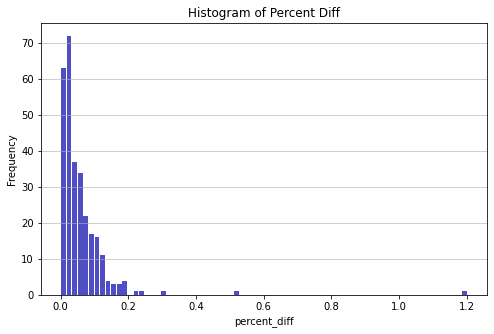

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=8,5
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=merged_df.percent_diff, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('percent_diff')
plt.ylabel('Frequency')
plt.title('Histogram of Percent Diff')
plt.show()